Prova de conceito utilizando o dataset construído pelo grupo

In [1]:
import pandas as pd

dados2 = pd.read_csv("Frases TCC.csv", sep=",")

In [2]:
dados = dados2.dropna()

In [3]:
dados

,Frase,Indica violência
0,Vou te matar,Sim
1,Eu vou te matar,Sim
2,Eu te mato,Sim
3,Vô te matar,Sim
4,Te mato,Sim
...,...,...
231,Morreu minha planta,Não
232,Mataram as abelhas,Não
233,Matei o pernilongo,Não
234,Morrendo de fome,Não


In [5]:
classificacao = dados["Indica violência"].replace(["Não","Sim"],[0,1])

In [6]:
dados["classificacao"]=classificacao

In [7]:
dados.groupby('classificacao').count()

,Frase,Indica violência
classificacao,,
0,174,174
1,62,62


In [8]:
import nltk
from nltk import tokenize

nltk.download('stopwords')

token_espaco = tokenize.WhitespaceTokenizer()

token_pontuacao = tokenize.WordPunctTokenizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

from string import punctuation

pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for texto in dados.Frase:
  nova_frase = list()
  texto = texto.lower()
  palavras_texto = token_espaco.tokenize(texto)
  for palavra in palavras_texto:
    if '@' not in palavra:
      if palavra not in pontuacao_stopwords:      
        nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

dados["tratamento_1"] = frase_processada

In [10]:
dados.head()

,Frase,Indica violência,classificacao,tratamento_1
0,Vou te matar,Sim,1,vou matar
1,Eu vou te matar,Sim,1,vou matar
2,Eu te mato,Sim,1,mato
3,Vô te matar,Sim,1,vô matar
4,Te mato,Sim,1,mato


In [11]:
!pip install unidecode

import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in dados["tratamento_1"]]

     |████████████████████████████████| 245kB 6.1MB/s 


In [12]:
dados["tratamento_2"] = sem_acentos

In [13]:
dados.head()

,Frase,Indica violência,classificacao,tratamento_1,tratamento_2
0,Vou te matar,Sim,1,vou matar,vou matar
1,Eu vou te matar,Sim,1,vou matar,vou matar
2,Eu te mato,Sim,1,mato,mato
3,Vô te matar,Sim,1,vô matar,vo matar
4,Te mato,Sim,1,mato,mato


In [14]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [15]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [16]:
stemer = nltk.RSLPStemmer()

frase_processada = list()
for tweet in dados["tratamento_2"]:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(tweet)
  for palavra in palavras_texto:
    if palavra not in stopwords_sem_acento:
      nova_frase.append(stemer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))

dados["tratamento_3"] = frase_processada

In [17]:
dados

,Frase,Indica violência,classificacao,tratamento_1,tratamento_2,tratamento_3
0,Vou te matar,Sim,1,vou matar,vou matar,vou mat
1,Eu vou te matar,Sim,1,vou matar,vou matar,vou mat
2,Eu te mato,Sim,1,mato,mato,mat
3,Vô te matar,Sim,1,vô matar,vo matar,vo mat
4,Te mato,Sim,1,mato,mato,mat
...,...,...,...,...,...,...
231,Morreu minha planta,Não,0,morreu planta,morreu planta,morr plant
232,Mataram as abelhas,Não,0,mataram abelhas,mataram abelhas,mat abelh
233,Matei o pernilongo,Não,0,matei pernilongo,matei pernilongo,mat pernilong
234,Morrendo de fome,Não,0,morrendo fome,morrendo fome,morr fom


In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [19]:
def nuvem_palavras_neg(texto, coluna_texto):  
  texto_negativo = texto.query("classificacao == '0'")
  todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [20]:
def nuvem_palavras_pos(texto, coluna_texto):  
  texto_positivo = texto.query("classificacao == '1'")
  todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [21]:
def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])

  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame({"Palavra":list(frequencia.keys()),"Frequência":list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(quantidade, "Frequência")
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data= df_frequencia, x = "Palavra", y = "Frequência")
  ax.set(ylabel= "Contagem")
  plt.show()

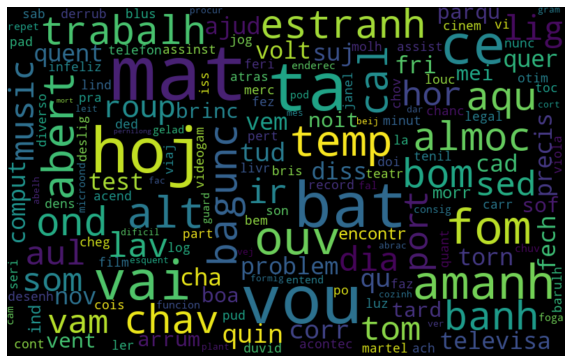

In [22]:
nuvem_palavras_neg(dados, "tratamento_3")

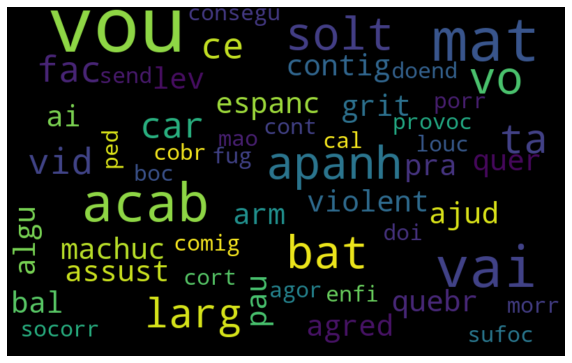

In [23]:
nuvem_palavras_pos(dados, "tratamento_3")

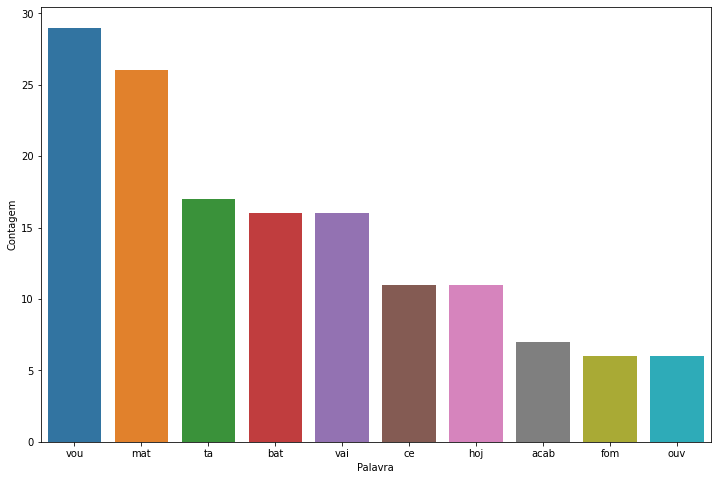

In [24]:
pareto(dados, "tratamento_3", 10)

In [25]:
def trata_frase(frase):
  frase_tratada = list()
  nova_frase = list()
  frase = frase.lower()
  palavras_texto = token_espaco.tokenize(frase)
  for palavra in palavras_texto:
    if '@' not in palavra:
      if palavra not in pontuacao_stopwords:      
        nova_frase.append(stemer.stem(palavra))
  frase_tratada.append(' '.join(nova_frase))
  frase_tratada = [unidecode.unidecode(frase) for frase in frase_tratada]
  
  return frase_tratada

In [26]:
resultados = pd.DataFrame(columns=['Classificador',
                                   'Acurácia',
                                   'Precisão [0]',
                                   'Precisão [1]',
                                   'Recall [0]',
                                   'Recall [1]',
                                   'Fscore [0]',
                                   'Fscore [1]',
                                   'Support [0]',
                                   'Support [1]',
                                   ])

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_fscore_support as score

tfidf1 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf2 = tfidf1.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf2, dados["classificacao"], random_state=42)
classificador = LogisticRegression(random_state=0, solver='lbfgs', class_weight='balanced')
classificador.fit(treino, classe_treino)
acuracia = classificador.score(teste, classe_teste)

precision, recall, fscore, support = score(classificador.predict(teste[:]), classe_teste)

resultados = resultados.append({
                                   'Classificador': 'LogisticRegression',
                                   'Acurácia': acuracia,
                                   'Precisão [0]': precision[0],
                                   'Precisão [1]': precision[1],
                                   'Recall [0]': recall[0],
                                   'Recall [1]': recall[1],
                                   'Fscore [0]': fscore[0],
                                   'Fscore [1]': fscore[1],
                                   'Support [0]': support[0],
                                   'Support [1]': support[1]
}, ignore_index=True)

print('accuracy: {}'.format(acuracia))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.8305084745762712
precision: [0.91304348 0.53846154]
recall: [0.875      0.63636364]
fscore: [0.89361702 0.58333333]
support: [48 11]


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_fscore_support as score

tfidf1 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf2 = tfidf1.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf2, dados["classificacao"], random_state=42)
classificador = SGDClassifier(loss='log', random_state=0)
classificador.fit(treino, classe_treino)
acuracia = classificador.score(teste, classe_teste)

precision, recall, fscore, support = score(classificador.predict(teste[:]), classe_teste)

resultados = resultados.append({
                                   'Classificador': 'SGDClassifier',
                                   'Acurácia': acuracia,
                                   'Precisão [0]': precision[0],
                                   'Precisão [1]': precision[1],
                                   'Recall [0]': recall[0],
                                   'Recall [1]': recall[1],
                                   'Fscore [0]': fscore[0],
                                   'Fscore [1]': fscore[1],
                                   'Support [0]': support[0],
                                   'Support [1]': support[1]
}, ignore_index=True)

print('accuracy: {}'.format(acuracia))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.9152542372881356
precision: [0.97826087 0.69230769]
recall: [0.91836735 0.9       ]
fscore: [0.94736842 0.7826087 ]
support: [49 10]


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import Perceptron

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_fscore_support as score

tfidf1 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf2 = tfidf1.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf2, dados["classificacao"], random_state=42)
classificador = Perceptron(tol=1e-3, random_state=0, class_weight='balanced')
classificador.fit(treino, classe_treino)
acuracia = classificador.score(teste, classe_teste)

precision, recall, fscore, support = score(classificador.predict(teste[:]), classe_teste)

resultados = resultados.append({
                                   'Classificador': 'Perceptron',
                                   'Acurácia': acuracia,
                                   'Precisão [0]': precision[0],
                                   'Precisão [1]': precision[1],
                                   'Recall [0]': recall[0],
                                   'Recall [1]': recall[1],
                                   'Fscore [0]': fscore[0],
                                   'Fscore [1]': fscore[1],
                                   'Support [0]': support[0],
                                   'Support [1]': support[1]
}, ignore_index=True)

print('accuracy: {}'.format(acuracia))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.7627118644067796
precision: [0.76086957 0.76923077]
recall: [0.92105263 0.47619048]
fscore: [0.83333333 0.58823529]
support: [38 21]


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_fscore_support as score

tfidf1 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf2 = tfidf1.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf2, dados["classificacao"], random_state=42)
classificador = PassiveAggressiveClassifier(max_iter=1000, random_state=0, tol=1e-3)
classificador.fit(treino, classe_treino)
acuracia = classificador.score(teste, classe_teste)

precision, recall, fscore, support = score(classificador.predict(teste[:]), classe_teste)

resultados = resultados.append({
                                   'Classificador': 'PassiveAggressiveClassifier',
                                   'Acurácia': acuracia,
                                   'Precisão [0]': precision[0],
                                   'Precisão [1]': precision[1],
                                   'Recall [0]': recall[0],
                                   'Recall [1]': recall[1],
                                   'Fscore [0]': fscore[0],
                                   'Fscore [1]': fscore[1],
                                   'Support [0]': support[0],
                                   'Support [1]': support[1]
}, ignore_index=True)

print('accuracy: {}'.format(acuracia))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.8135593220338984
precision: [0.84782609 0.69230769]
recall: [0.90697674 0.5625    ]
fscore: [0.87640449 0.62068966]
support: [43 16]


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_fscore_support as score

tfidf1 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf2 = tfidf1.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf2, dados["classificacao"], random_state=42)
classificador = MLPClassifier(alpha=1, max_iter=1000, solver='lbfgs', random_state=0)
classificador.fit(treino, classe_treino)
acuracia = classificador.score(teste, classe_teste)

precision, recall, fscore, support = score(classificador.predict(teste[:]), classe_teste)

resultados = resultados.append({
                                   'Classificador': 'MLPClassifier',
                                   'Acurácia': acuracia,
                                   'Precisão [0]': precision[0],
                                   'Precisão [1]': precision[1],
                                   'Recall [0]': recall[0],
                                   'Recall [1]': recall[1],
                                   'Fscore [0]': fscore[0],
                                   'Fscore [1]': fscore[1],
                                   'Support [0]': support[0],
                                   'Support [1]': support[1]
}, ignore_index=True)

print('accuracy: {}'.format(acuracia))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.847457627118644
precision: [0.97826087 0.38461538]
recall: [0.8490566  0.83333333]
fscore: [0.90909091 0.52631579]
support: [53  6]


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_fscore_support as score

tfidf1 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf2 = tfidf1.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf2, dados["classificacao"], random_state=42)
classificador = KNeighborsClassifier(19)
classificador.fit(treino, classe_treino)
acuracia = classificador.score(teste, classe_teste)

precision, recall, fscore, support = score(classificador.predict(teste[:]), classe_teste)

resultados = resultados.append({
                                   'Classificador': 'KNeighborsClassifier',
                                   'Acurácia': acuracia,
                                   'Precisão [0]': precision[0],
                                   'Precisão [1]': precision[1],
                                   'Recall [0]': recall[0],
                                   'Recall [1]': recall[1],
                                   'Fscore [0]': fscore[0],
                                   'Fscore [1]': fscore[1],
                                   'Support [0]': support[0],
                                   'Support [1]': support[1]
}, ignore_index=True)

print('accuracy: {}'.format(acuracia))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.8135593220338984
precision: [0.95652174 0.30769231]
recall: [0.83018868 0.66666667]
fscore: [0.88888889 0.42105263]
support: [53  6]


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_fscore_support as score

tfidf1 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf2 = tfidf1.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf2, dados["classificacao"], random_state=42)
classificador = SVC(class_weight='balanced', random_state=0)
classificador.fit(treino, classe_treino)
acuracia = classificador.score(teste, classe_teste)

precision, recall, fscore, support = score(classificador.predict(teste[:]), classe_teste)

resultados = resultados.append({
                                   'Classificador': 'SVC',
                                   'Acurácia': acuracia,
                                   'Precisão [0]': precision[0],
                                   'Precisão [1]': precision[1],
                                   'Recall [0]': recall[0],
                                   'Recall [1]': recall[1],
                                   'Fscore [0]': fscore[0],
                                   'Fscore [1]': fscore[1],
                                   'Support [0]': support[0],
                                   'Support [1]': support[1]
}, ignore_index=True)

print('accuracy: {}'.format(acuracia))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.847457627118644
precision: [1.         0.30769231]
recall: [0.83636364 1.        ]
fscore: [0.91089109 0.47058824]
support: [55  4]


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.gaussian_process.kernels import RBF

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_fscore_support as score

tfidf1 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf2 = tfidf1.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf2, dados["classificacao"], random_state=42)
kernel = 1.0 * RBF(1.0)
classificador = GaussianProcessClassifier(kernel=kernel, random_state=0)
classificador.fit(treino.todense(), classe_treino)
acuracia = classificador.score(teste.todense(), classe_teste)

precision, recall, fscore, support = score(classificador.predict(teste[:].todense()), classe_teste)

resultados = resultados.append({
                                   'Classificador': 'GaussianProcessClassifier',
                                   'Acurácia': acuracia,
                                   'Precisão [0]': precision[0],
                                   'Precisão [1]': precision[1],
                                   'Recall [0]': recall[0],
                                   'Recall [1]': recall[1],
                                   'Fscore [0]': fscore[0],
                                   'Fscore [1]': fscore[1],
                                   'Support [0]': support[0],
                                   'Support [1]': support[1]
}, ignore_index=True)

print('accuracy: {}'.format(acuracia))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.864406779661017
precision: [1.         0.38461538]
recall: [0.85185185 1.        ]
fscore: [0.92       0.55555556]
support: [54  5]


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_fscore_support as score

tfidf1 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf2 = tfidf1.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf2, dados["classificacao"], random_state=42)
classificador =  DecisionTreeClassifier(random_state=0)
classificador.fit(treino, classe_treino)
acuracia = classificador.score(teste, classe_teste)

precision, recall, fscore, support = score(classificador.predict(teste[:]), classe_teste)

resultados = resultados.append({
                                   'Classificador': 'DecisionTreeClassifier',
                                   'Acurácia': acuracia,
                                   'Precisão [0]': precision[0],
                                   'Precisão [1]': precision[1],
                                   'Recall [0]': recall[0],
                                   'Recall [1]': recall[1],
                                   'Fscore [0]': fscore[0],
                                   'Fscore [1]': fscore[1],
                                   'Support [0]': support[0],
                                   'Support [1]': support[1]
}, ignore_index=True)

print('accuracy: {}'.format(acuracia))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.847457627118644
precision: [0.93478261 0.53846154]
recall: [0.87755102 0.7       ]
fscore: [0.90526316 0.60869565]
support: [49 10]


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_fscore_support as score

tfidf1 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf2 = tfidf1.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf2, dados["classificacao"], random_state=42)
classificador =  RandomForestClassifier(n_estimators=25, random_state=0)
classificador.fit(treino, classe_treino)
acuracia = classificador.score(teste, classe_teste)

precision, recall, fscore, support = score(classificador.predict(teste[:]), classe_teste)

resultados = resultados.append({
                                   'Classificador': 'RandomForestClassifier',
                                   'Acurácia': acuracia,
                                   'Precisão [0]': precision[0],
                                   'Precisão [1]': precision[1],
                                   'Recall [0]': recall[0],
                                   'Recall [1]': recall[1],
                                   'Fscore [0]': fscore[0],
                                   'Fscore [1]': fscore[1],
                                   'Support [0]': support[0],
                                   'Support [1]': support[1]
}, ignore_index=True)

print('accuracy: {}'.format(acuracia))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.8305084745762712
precision: [0.97826087 0.30769231]
recall: [0.83333333 0.8       ]
fscore: [0.9        0.44444444]
support: [54  5]


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_fscore_support as score

tfidf1 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf2 = tfidf1.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf2, dados["classificacao"], random_state=42)
classificador =  AdaBoostClassifier(n_estimators=20, random_state=0)
classificador.fit(treino, classe_treino)
acuracia = classificador.score(teste, classe_teste)

precision, recall, fscore, support = score(classificador.predict(teste[:]), classe_teste)

resultados = resultados.append({
                                   'Classificador': 'AdaBoostClassifier',
                                   'Acurácia': acuracia,
                                   'Precisão [0]': precision[0],
                                   'Precisão [1]': precision[1],
                                   'Recall [0]': recall[0],
                                   'Recall [1]': recall[1],
                                   'Fscore [0]': fscore[0],
                                   'Fscore [1]': fscore[1],
                                   'Support [0]': support[0],
                                   'Support [1]': support[1]
}, ignore_index=True)

print('accuracy: {}'.format(acuracia))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.8305084745762712
precision: [0.93478261 0.46153846]
recall: [0.86       0.66666667]
fscore: [0.89583333 0.54545455]
support: [50  9]


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_fscore_support as score

tfidf1 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf2 = tfidf1.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf2, dados["classificacao"], random_state=42)
classificador =  GaussianNB()
classificador.fit(treino.todense(), classe_treino)
acuracia = classificador.score(teste.todense(), classe_teste)

precision, recall, fscore, support = score(classificador.predict(teste[:].todense()), classe_teste)

resultados = resultados.append({
                                   'Classificador': 'GaussianNB',
                                   'Acurácia': acuracia,
                                   'Precisão [0]': precision[0],
                                   'Precisão [1]': precision[1],
                                   'Recall [0]': recall[0],
                                   'Recall [1]': recall[1],
                                   'Fscore [0]': fscore[0],
                                   'Fscore [1]': fscore[1],
                                   'Support [0]': support[0],
                                   'Support [1]': support[1]
}, ignore_index=True)

print('accuracy: {}'.format(acuracia))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.6271186440677966
precision: [0.58695652 0.76923077]
recall: [0.9        0.34482759]
fscore: [0.71052632 0.47619048]
support: [30 29]


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.metrics import precision_recall_fscore_support as score

tfidf1 = TfidfVectorizer(lowercase=False,ngram_range=(1,2))

tfidf2 = tfidf1.fit_transform(dados["tratamento_3"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf2, dados["classificacao"], random_state=42)
classificador =  QuadraticDiscriminantAnalysis()
classificador.fit(treino.todense(), classe_treino)
acuracia = classificador.score(teste.todense(), classe_teste)

precision, recall, fscore, support = score(classificador.predict(teste[:].todense()), classe_teste)

resultados = resultados.append({
                                   'Classificador': 'QuadraticDiscriminantAnalysis',
                                   'Acurácia': acuracia,
                                   'Precisão [0]': precision[0],
                                   'Precisão [1]': precision[1],
                                   'Recall [0]': recall[0],
                                   'Recall [1]': recall[1],
                                   'Fscore [0]': fscore[0],
                                   'Fscore [1]': fscore[1],
                                   'Support [0]': support[0],
                                   'Support [1]': support[1]
}, ignore_index=True)

print('accuracy: {}'.format(acuracia))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy: 0.3728813559322034
precision: [0.2826087  0.69230769]
recall: [0.76470588 0.21428571]
fscore: [0.41269841 0.32727273]
support: [17 42]


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [40]:
resultados

,Classificador,Acurácia,Precisão [0],Precisão [1],Recall [0],Recall [1],Fscore [0],Fscore [1],Support [0],Support [1]
0,LogisticRegression,0.830508,0.913043,0.538462,0.875000,0.636364,0.893617,0.583333,48,11
1,SGDClassifier,0.915254,0.978261,0.692308,0.918367,0.900000,0.947368,0.782609,49,10
2,Perceptron,0.762712,0.760870,0.769231,0.921053,0.476190,0.833333,0.588235,38,21
3,PassiveAggressiveClassifier,0.813559,0.847826,0.692308,0.906977,0.562500,0.876404,0.620690,43,16
4,MLPClassifier,0.847458,0.978261,0.384615,0.849057,0.833333,0.909091,0.526316,53,6
5,KNeighborsClassifier,0.813559,0.956522,0.307692,0.830189,0.666667,0.888889,0.421053,53,6
6,SVC,0.847458,1.000000,0.307692,0.836364,1.000000,0.910891,0.470588,55,4
7,GaussianProcessClassifier,0.864407,1.000000,0.384615,0.851852,1.000000,0.920000,0.555556,54,5
8,DecisionTreeClassifier,0.847458,0.934783,0.538462,0.877551,0.700000,0.905263,0.608696,49,10
9,RandomForestClassifier,0.830508,0.978261,0.307692,0.833333,0.800000,0.900000,0.444444,54,5


In [41]:
resultados.to_excel("classificadores.xlsx")

In [44]:
import pickle
pickle.dump(classificador, open('modelo.sav', 'wb'))
pickle.dump(tfidf1, open("vectorizer.pickle", "wb"))